In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
from sklearn.model_selection import train_test_split
import joblib
import spacy
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
dataset_path = '/content/drive/MyDrive/datasets/phishing_email.csv'
data = pd.read_csv(dataset_path)

In [4]:
data.shape

(82486, 2)

In [5]:
data.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
data.isnull().sum()

,0
text_combined,0
label,0


In [8]:
data.duplicated().sum()

408

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:

data['label'].value_counts()

,count
label,
1,42845
0,39233


In [12]:
nltk.download('punkt', force=True)
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
def preprocess_text(text):
        # Remove hyperlinks
        text = re.sub(r'http\S+', '', text)

        # Remove punctuations
        text = re.sub(r'[^\w\s]', '', text)

        # remove special characters
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        # Convert to lowercase
        text = text.lower()

        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()

        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return ' '.join(tokens)

# Apply the preprocess_text function to the subject and body column in the DataFrame
data['text_combined'] = data['text_combined'].apply(preprocess_text)

In [14]:
data['text_combined'].head()

,text_combined
0,hpl nom may see attached file hplno xls hplno xls
1,nom actual vols th forwarded sabrae zajac hou ...
2,enron actuals march april estimated actuals ma...
3,hpl nom may see attached file hplno xls hplno xls
4,hpl nom june see attached file hplno xls hplno...


In [15]:
# Separate features (email text) and target (labels)
X = data['text_combined']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# TF-IDF Vectorization for traditional models
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [17]:
print('X_train_tfidf shape is ' , X_train_tfidf.shape)
print('y_train shape is ' , y_train.shape)
print('X_test_tfidf shape is ' , X_test_tfidf.shape)
print('y_test shape is ' , y_test.shape)

X_train_tfidf shape is  (65662, 314894)
y_train shape is  (65662,)
X_test_tfidf shape is  (16416, 314894)
y_test shape is  (16416,)


In [18]:
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)
y_pred = log_model.predict(X_test_tfidf)

Accuracy :  0.9832480506822612
precision :  0.9805330243337196
Recall :  0.9875131287198039


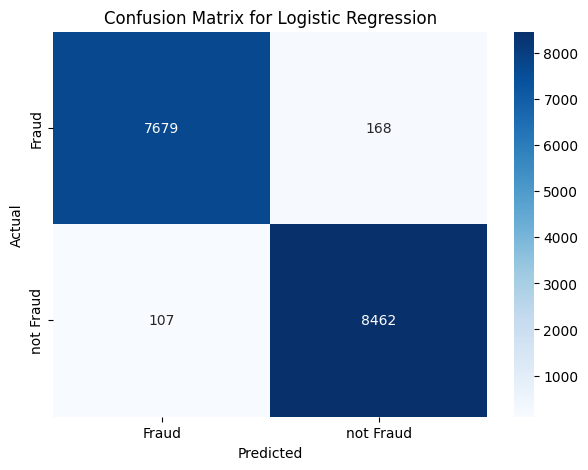

In [19]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('precision : ', metrics.precision_score(y_test, y_pred))
print('Recall : ', metrics.recall_score(y_test, y_pred))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fraud', 'not Fraud'],
            yticklabels=['Fraud', 'not Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [20]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7847
           1       0.98      0.99      0.98      8569

    accuracy                           0.98     16416
   macro avg       0.98      0.98      0.98     16416
weighted avg       0.98      0.98      0.98     16416



<!-- DEEP LEARNING -->

In [21]:
# save the model
joblib.dump(log_model, '/content/Log_model.pkl')

['/content/Log_model.pkl']

# Real data for model testing

In [22]:
test_data_extended = {
    'descriptor': [
        "Right To rent request",
        "Unknown loan request",
        "Email verification",
        "Follow up with letting agency",
        "Unknown loan approval!",
        "Confirmation for a property view",
        "Registration for Agency",
        "Suspicious activity alert",
        "Account deactivation warning",
        "Secure your account",
        "Prize-winning notification",
        "Monthly billing statement",
        "Job application confirmation",
        "Payment overdue reminder",
        "Password reset request",
        "Important account update",
        "Lottery winnings",
        "New device sign-in alert",
        "Urgent tax payment request",
        "Account suspension alert"
    ],
    'email_text': [
        "1-Good afternoon,Hope you are well.The management company asks for your right to rent share codes. Please can you send me the share codes to prove your right to rent for yourself and your partner.Thank you.",
        "2-Welcome! Welcome! We'll transfer your loan as quickly as possible into your bank account. Our aim is to make your loan as easy as is possible.",
        "3-Please use the above code to verify your email ID for signing into Bito Workspace.Thank you,Team Bito.",
        "4-Hi, I hope you are well. I just wanted to follow up after the viewing we had on Friday at the Royal Winchester House. Have you made a decision on whether to proceed or not?",
        "5-Hello there! We are so happy to help you get your loan. We promise to get the amount of your loan directly into your bank account as fast as we can. Our goal is to simplify the loan process for you. Get Loan Now",
        "6-This is to confirm that your viewing has been arranged for Friday, 14 June 2024 at 3:00 PM at the following properties. The meeting point is at Rrakell",
        "7-Good day,Hope all is well!.Thank you for your interest in Cromwell Medical Staffing!In order to complete your registration with us, there are a few steps that need to be completed.Step 1 - Internal documents to be completed and signed by yourself.",
        "8-We’ve noticed suspicious activity on your account. Please review your recent transactions and secure your account immediately.",
        "9-Your account will be deactivated within 24 hours due to inactivity. Please log in now to avoid losing access.",
        "10-Your account has been locked due to multiple login attempts. Click here to secure your account.",
        "11-Congratulations! You've won a prize! Claim your reward now by clicking this link.",
        "12-Dear customer, please find attached your monthly billing statement. Review the details and ensure timely payment.",
        "13-Thank you for your job application. We will review your details and get back to you shortly.",
        "13-This is a reminder that your payment is overdue. Please make the payment at your earliest convenience to avoid penalties.",
        "14-We received a request to reset your password. If this was not you, please ignore this email.",
        "15-Dear customer, we are updating our privacy policies. Please review the changes here.",
        "16-You have won a large sum in our lottery draw! Claim your winnings by clicking here.",
        "17-We detected a sign-in from a new device. Please verify if this was you.",
        "18-This is a final notice for your overdue tax payment. Avoid legal action by making payment now.",
        "19-Your account has been suspended due to suspicious activity. Reactivate it by verifying your identity."
    ],
    'true_labels': [
        0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1  # 0: non-phishing, 1: phishing
    ]
}
df = pd.DataFrame(test_data_extended)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

loaded_log_model = joblib.load('/content/Log_model.pkl')

# Initialize lists to store descriptors, predictions, and true labels
descriptors = []
predictions = []
true_labels = []
email_texts = []

# Iterate over each row in the dataframe
for index, row in df.iterrows():
    descriptor = row['descriptor']
    email_text = row['email_text']
    true_label = row['true_labels']

    # Preprocess the email text (assuming 'vectorizer' is your TF-IDF vectorizer)
    X_email = tfidf.transform([email_text])

    # Predict using the logistic model
    predicted_label = loaded_log_model.predict(X_email)

    # Append the descriptor, predicted label, true label, and email text to their respective lists
    descriptors.append(descriptor)
    predictions.append(predicted_label[0])  # Since predicted_label is an array, get the first element
    true_labels.append(true_label)
    email_texts.append(email_text)

# Convert lists to numpy arrays for easier comparison
descriptors = np.array(descriptors)
predictions = np.array(predictions)
true_labels = np.array(true_labels)
email_texts = np.array(email_texts)

In [24]:
# Print descriptors, predicted labels, true labels, and email texts
for i in range(len(descriptors)):
    print(f"\nEmail text: {email_texts[i]}")
    print(f"\nDescriptor: {descriptors[i]}")
    print(f"Predicted label: {'Fraud' if predictions[i] == 1 else 'Non-Fraud'}")
    print(f"True label: {'Fraud' if true_labels[i] == 1 else 'Non-Fraud'}")


Email text: 1-Good afternoon,Hope you are well.The management company asks for your right to rent share codes. Please can you send me the share codes to prove your right to rent for yourself and your partner.Thank you.

Descriptor: Right To rent request
Predicted label: Fraud
True label: Non-Fraud

Email text: 2-Welcome! Welcome! We'll transfer your loan as quickly as possible into your bank account. Our aim is to make your loan as easy as is possible.

Descriptor: Unknown loan request
Predicted label: Fraud
True label: Fraud

Email text: 3-Please use the above code to verify your email ID for signing into Bito Workspace.Thank you,Team Bito.

Descriptor: Email verification
Predicted label: Non-Fraud
True label: Non-Fraud

Email text: 4-Hi, I hope you are well. I just wanted to follow up after the viewing we had on Friday at the Royal Winchester House. Have you made a decision on whether to proceed or not?

Descriptor: Follow up with letting agency
Predicted label: Non-Fraud
True label